In [2]:
import pandas as pd

# Load data from a text file
!curl -O https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   322  100   322    0     0    963      0 --:--:-- --:--:-- --:--:--   972
100   322  100   322    0     0    962      0 --:--:-- --:--:-- --:--:--   972


,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


C:\Users\Justin\AppData\Local\Temp\ipykernel_28440\1953956388.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\Justin\AppData\Local\Temp\ipykernel_28440\1953956388.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


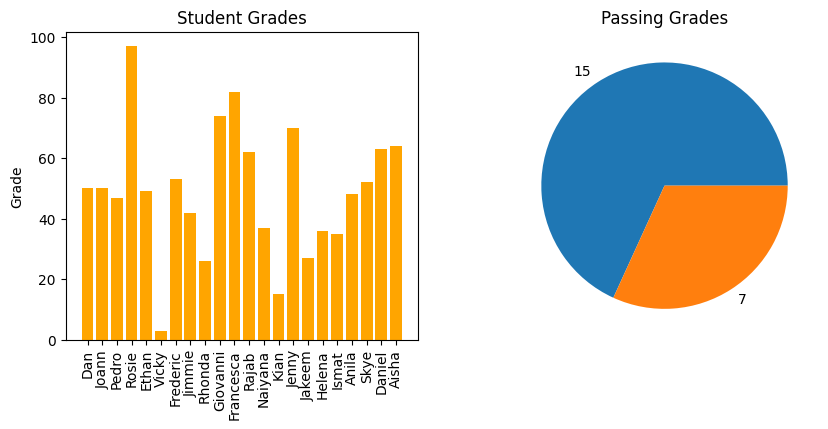

In [10]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color="orange")

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)
ax[0].set_ylabel("Grade")

pass_count = df_students.Pass.value_counts()
ax[1].pie(pass_count, labels=pass_count)
ax[1].set_title("Passing Grades")

fig.show()

<Axes: xlabel='Name'>

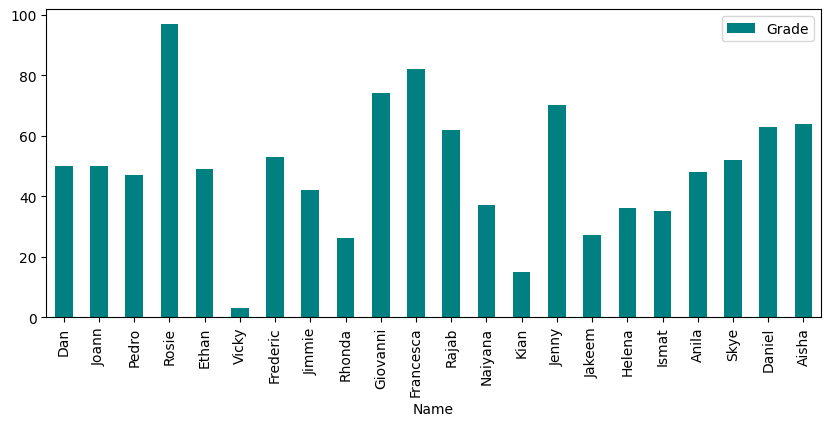

In [11]:
df_students.plot.bar(x='Name', y='Grade', figsize=(10,4), color="teal")

C:\Users\Justin\AppData\Local\Temp\ipykernel_28440\521702232.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


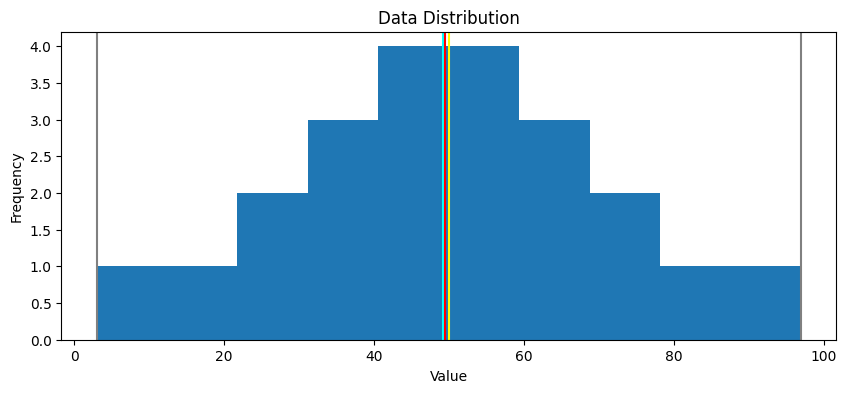

In [13]:
grades = df_students.Grade

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
median_val = df_students.Grade.median()
mode_val = df_students.Grade.mode()[0]

fig = plt.figure(figsize=(10,4))

plt.hist(grades)

plt.axvline(min_val, color='gray')
plt.axvline(max_val, color='gray')
plt.axvline(mean_val, color='cyan')
plt.axvline(median_val, color='red')
plt.axvline(mode_val, color='yellow')

plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig.show()

C:\Users\Justin\AppData\Local\Temp\ipykernel_28440\2847058452.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


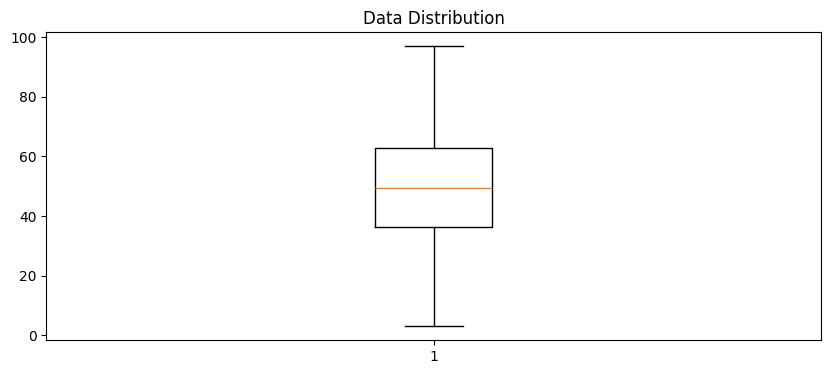

In [14]:
grades = df_students.Grade

fig = plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title("Data Distribution")

fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Justin\AppData\Local\Temp\ipykernel_28440\1918122812.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


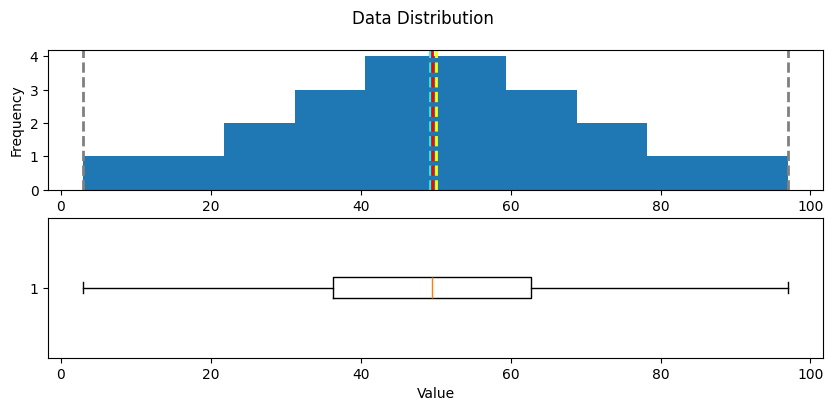

In [15]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

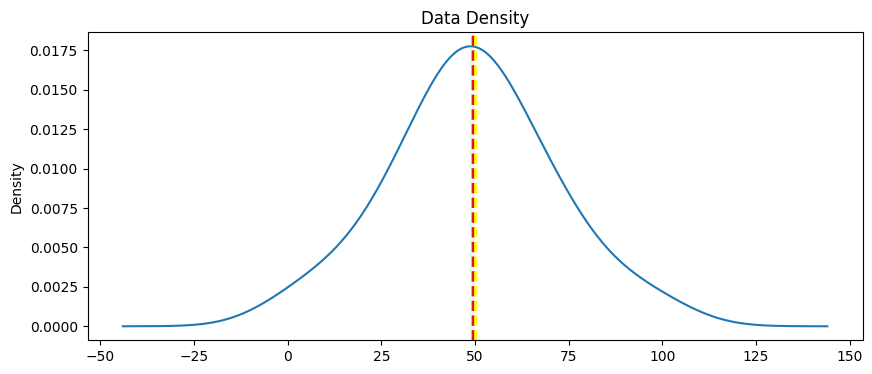

In [17]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)